# Business Analytics
# Assignment 1
# Mohammed Sarshaar

## Exploratory Data Analysis on Black Friday Sales Dataset

I am using Black Friday sales dataset from Kaggle for exploratory Data Analysis.

 https://www.kaggle.com/datasets/pranavuikey/black-friday-sales-eda?resource=download


**Objective:** To perform data cleansing and do EDA to find out


*   Highest Selling Product
*   Product generating highest revenue
*   Sales vs Gender
*   Sales vs Age group
*   Sales vs Marital Status
*   Sales vs Occupation
*   Sales vs City Category









In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sb

In [12]:
# importing csv file
df = pd.read_csv('/content/BlackFridaySales.csv')

In [13]:
# Reading top 10 records
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [14]:
# Row and column count
df.shape

(550068, 12)

## Data Overview

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Overview of data:

*   The dataframe contains 12 columns and 550068 records.
*   It has sales transaction data during black friday.
*   The columns which are useful for our analysis are user_id, product_id, gender,age, occupation, city_category, marital_status and purchase.
*   The columns product category 2 and product category 3 have missing values but I would not like to use these columns for my analysis.
*   The columns of my interest are of int and object datatype
*   The data is masked and original data is replaced with substitute values





  

## Data Preprocessing/Cleansing

In [16]:
# dropping Product_Category_2 and Product_Category_3 columns
df.drop(['Product_Category_2', 'Product_Category_3'], axis=1, inplace=True)

In [17]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

In [19]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


## Exploratory Data Analysis

### Highest Selling Product

<Axes: xlabel='Product_ID', ylabel='User_ID'>

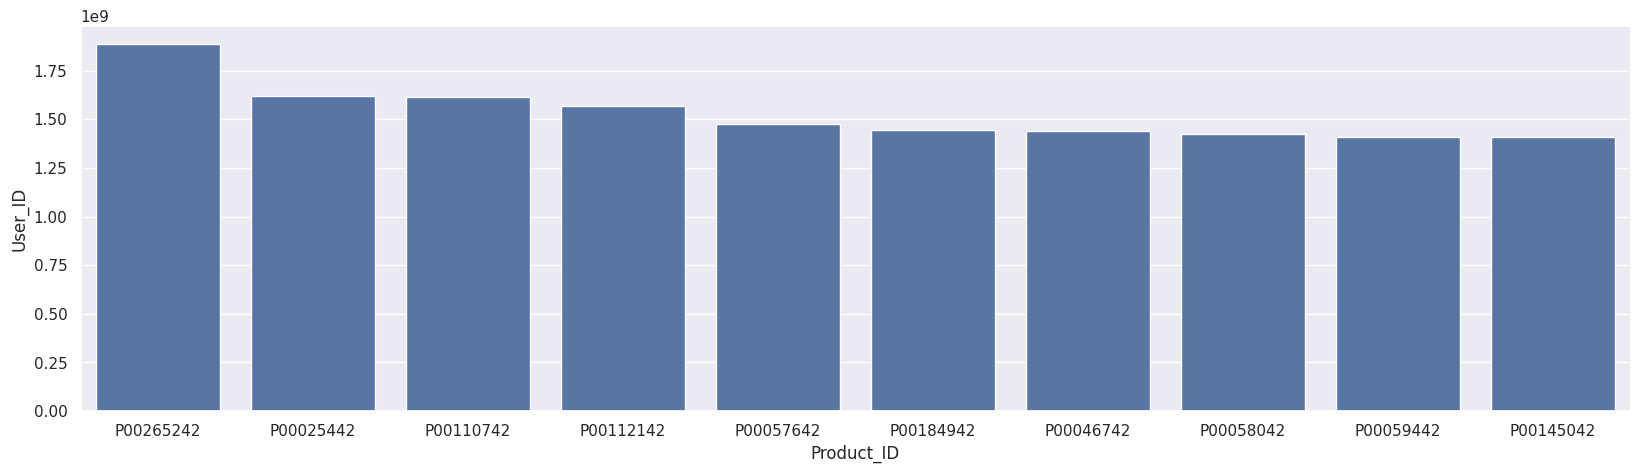

In [32]:
#Finding the most sold product
prod_count = df.groupby(['Product_ID'], as_index=False)['User_ID'].sum().sort_values(by='User_ID', ascending=False).head(10)
sb.barplot(data = prod_count, x = 'Product_ID',y= 'User_ID')

Product_ID: P000265242 is the highest selling product

### Product generating highest revenue

<Axes: xlabel='Product_ID', ylabel='Purchase'>

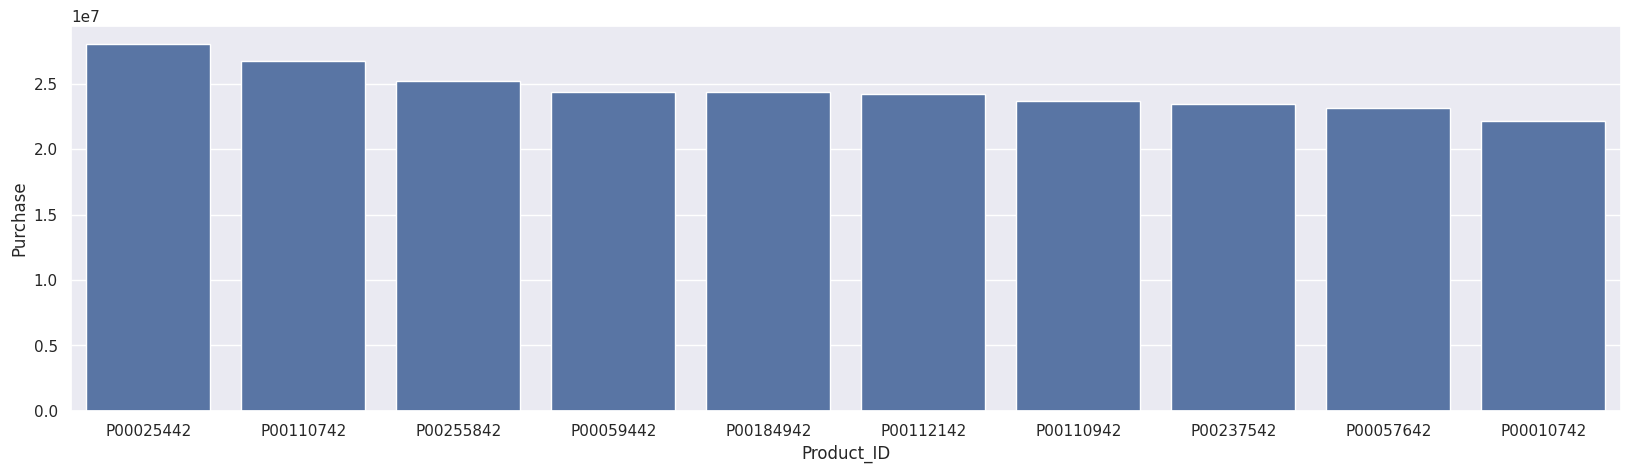

In [33]:
#Finding product which generated most revenue
prod_revenue = df.groupby(['Product_ID'], as_index=False)['Purchase'].sum().sort_values(by='Purchase', ascending=False).head(10)
sb.barplot(data = prod_revenue, x = 'Product_ID',y= 'Purchase')

Product_ID: P00025442 generated highest revenue during Black Friday Sale

### Sales vs Gender

<Axes: xlabel='Gender', ylabel='Purchase'>

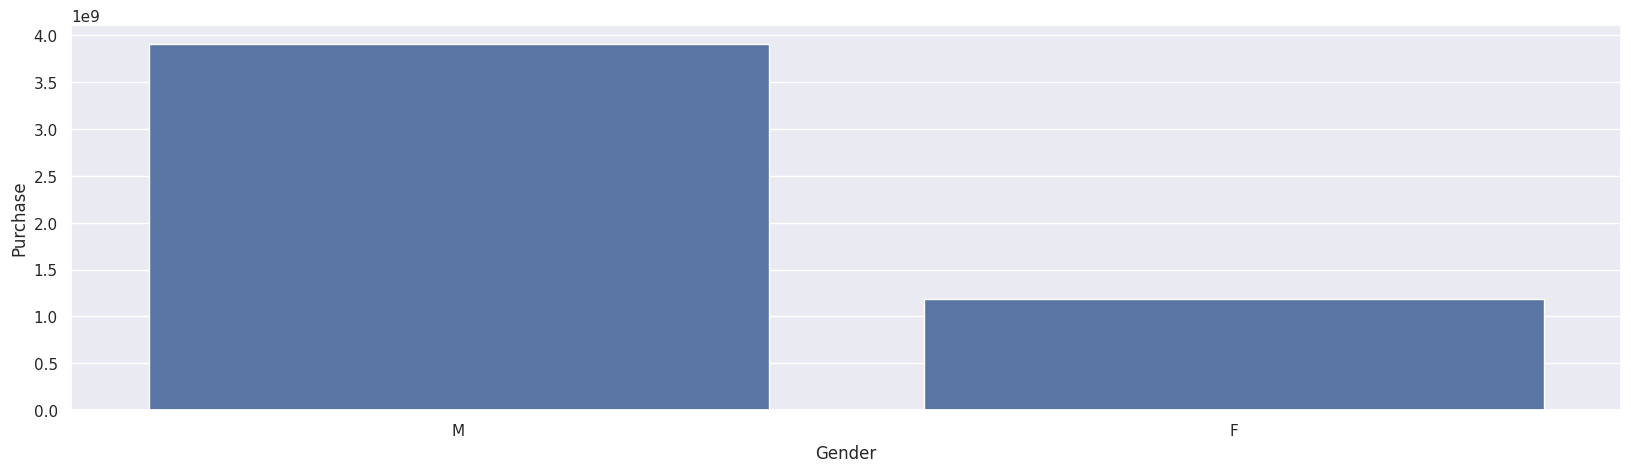

In [34]:
#Finding the gender which spent the most
gender = df.groupby(['Gender'], as_index=False)['Purchase'].sum().sort_values(by='Purchase', ascending=False)
sb.barplot(x = 'Gender',y= 'Purchase' ,data = gender)

The Male population made the most purchases during Black Friday Sale

### Sales vs Age group

<Axes: xlabel='Age', ylabel='Purchase'>

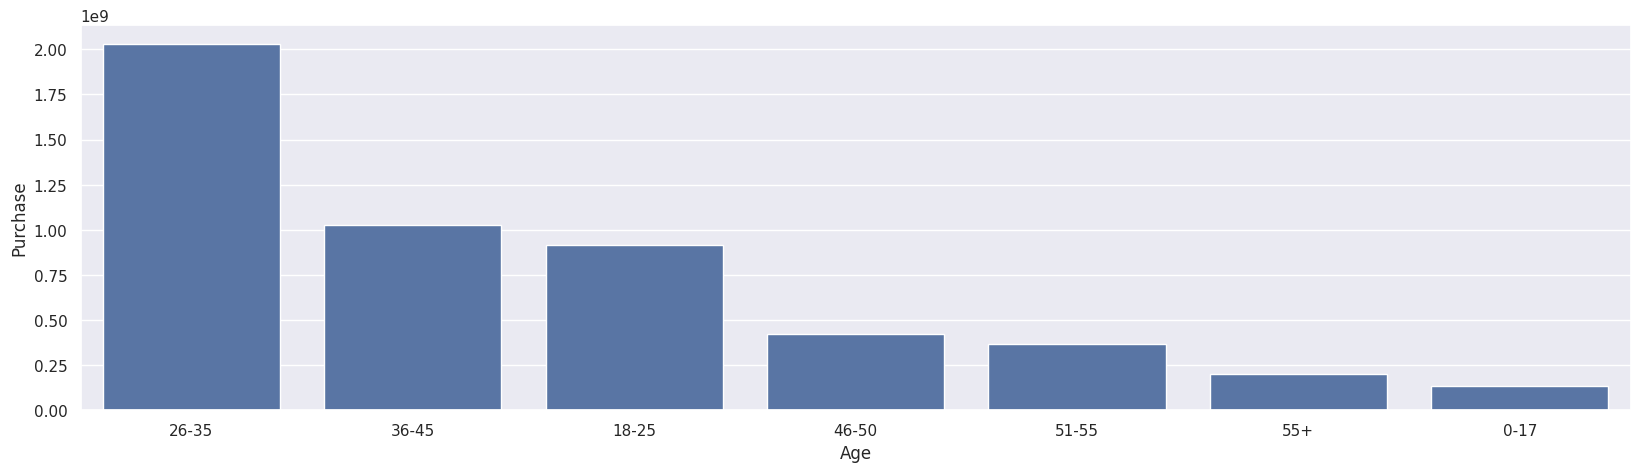

In [36]:
#Finding Age Group which made the most purchases
AgeGroup = df.groupby(['Age'], as_index=False)['Purchase'].sum().sort_values(by='Purchase', ascending=False)
sb.barplot(x = 'Age',y= 'Purchase' ,data = AgeGroup)

The Age group which did the most shopping was 26-35 years

### Sales vs Marital Status

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

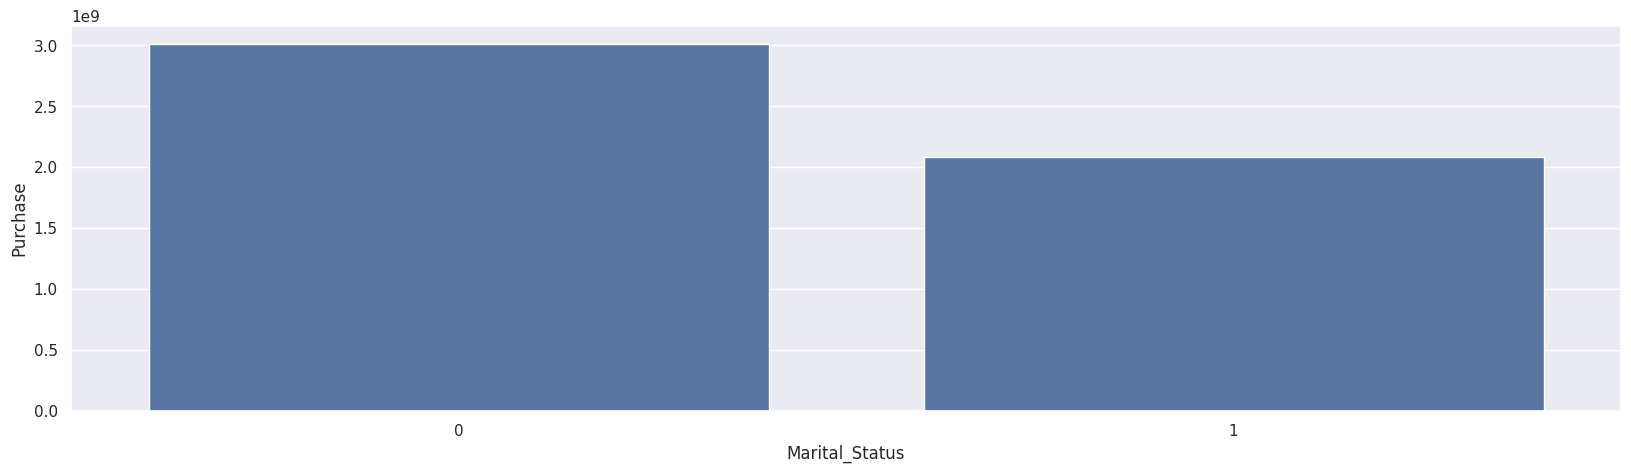

In [37]:
#Finding Marital Group which made the most purchases
marital = df.groupby(['Marital_Status'], as_index=False)['Purchase'].sum().sort_values(by='Purchase', ascending=False)
sb.barplot(data = marital, x = 'Marital_Status',y= 'Purchase')

Unmarried population did the most shopping during Black Friday Sale

### Sales vs Occupation

<Axes: xlabel='Occupation', ylabel='Purchase'>

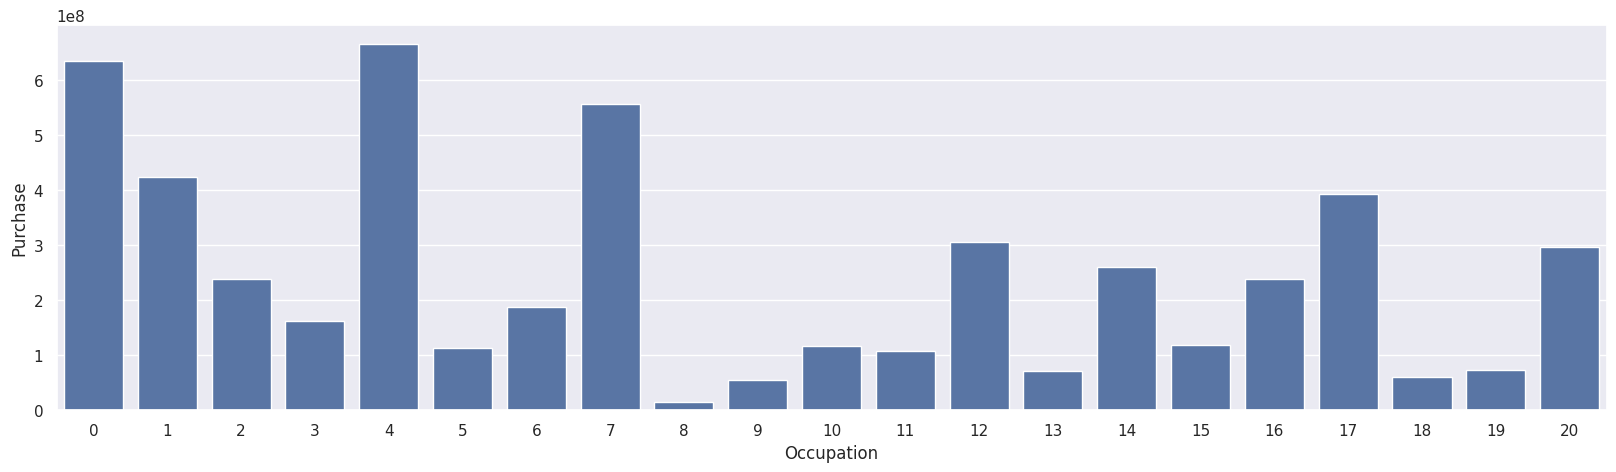

In [38]:
#Finding Occupation which made the most purchases
occupation_df = df.groupby(['Occupation'], as_index=False)['Purchase'].sum().sort_values(by='Purchase', ascending=False)
sb.barplot(data = occupation_df, x = 'Occupation',y= 'Purchase')

The people with occupation **4** have done most shopping during the Black Friday sale

### Sales vs City Category

<Axes: xlabel='City_Category', ylabel='Purchase'>

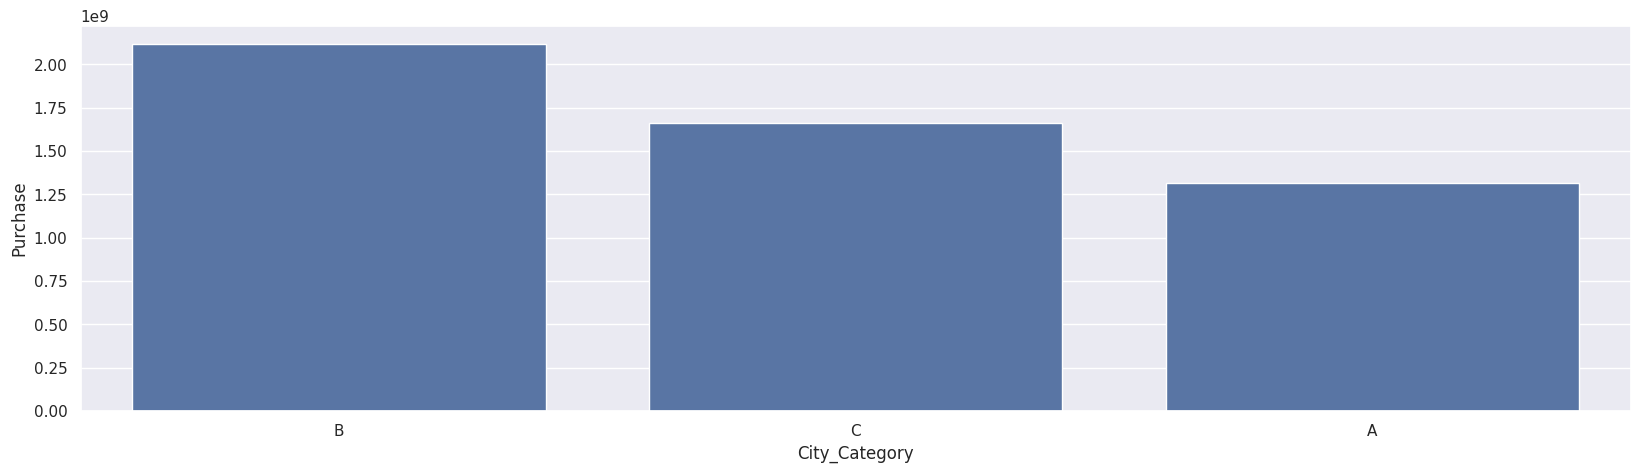

In [39]:
#Finding City category which made the most purchases
city = df.groupby(['City_Category'], as_index=False)['Purchase'].sum().sort_values(by='Purchase', ascending=False).head(10)
sb.barplot(data = city, x = 'City_Category',y= 'Purchase')

People from City_category **B** have done the most shopping during Black friday sale

## Analysis Conclusion



1.   Product_ID: **P000265242** is the highest selling product
2.   Product_ID: **P00025442** generated highest revenue during Black Friday Sale
3.   The **Male** population made the most purchases during Black Friday Sale
4.   The Age group which did the most shopping was **26-35** years.
5.   **Unmarried** population did the most shopping during Black Friday Sale
6.   The people with occupation **4** have done most shopping during the Black Friday sale
7.   People from City_category **B** have done the most shopping during Black friday sale  



The results from EDA provides valuable insights about the Black Friday Sale and helps to focus marketing on specific customer segments and understand purchase patterns. It helps in sales forecasting, pricing optimization and inventory management.

